# New England Shelf Basin Bathymetry

**Purpose:** display horizontal grid difference on regional domain.

Description: The area that includes the [OOI Coastal Pioneer profiler moorings](https://ooinet.oceanobservatories.org), and is bounded by land on the west and north. The data is bounded in longitude, $[75.5 \:\: 70]^\circ $W, and in latitude, $[38 \:\: 42]^\circ $N.

Reference: Tozer, Brook, et al. "Global bathymetry and topography at 15 arc sec: SRTM15+." _Earth and Space Science 6.10_ (2019): 1847-1864. https://topex.ucsd.edu/sandwell/publications/180_Tozer_SRTM15+.pdf

Data from: https://topex.ucsd.edu/cgi-bin/get_srtm15.cgi

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import xmitgcm
import os
import matplotlib.pyplot as plt
from matplotlib import cm, colors

In [2]:
scr2Dir = '/scratch2/ivana'

# Set directory paths
# 1) global GRID at high resolution
# 2) regional GRID at high resolution
globalGRID=f'{scr2Dir}/grids/llc4320'

# specify downloaded data file
if os.getenv('HOSTNAME') is not None:
    bathyDir = scr2Dir + '/regionalgcm/data/ncFiles'
else: 
    bathyDir = '/Users/ivanaescobar/work/pioneer/ncFiles'
bathyFile = f'{bathyDir}/bathymetry.nc'

In [3]:
dsBathy = xr.open_dataset(bathyFile)
dsBathy

<xarray.Dataset>
Dimensions:   (i: 343, j: 321)
Coordinates:
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 335 336 337 338 339 340 341 342
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
    lon       (j, i) float64 ...
    lat       (j, i) float64 ...
Data variables:
    depth     (j, i) float64 ...
    depthNaN  (j, i) float64 ...

## Load llc90 and llc4320 grids



In [4]:
dgrid90 = xr.open_dataset(f'{scr2Dir}/grids/llc90/ECCO-GRID.nc').sel(tile=10)
dgrid90

<xarray.Dataset>
Dimensions:  (k_p1: 51, j_g: 90, i_g: 90, k: 50, j: 90, k_u: 50, i: 90, k_l: 50)
Coordinates: (12/38)
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49 50
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * k_u      (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    ...       ...
    hFacS    (k, j_g, i) float32 ...
    hFacC    (k, j, i) float32 ...
    hFacW    (k, j, i_g) float32 ...
    maskW    (k, j, i_g) bool ...
    maskC    (k, j, i) bool ...
    maskS    (k, j_g, i) bool ...
Data variables:
    *empty*
Attributes:
    date_created:  Mon Dec 30 11:13:26 2019
    title:         ECCOv4 MITgcm grid information

In [5]:
llc4320_extra_metadata = xmitgcm.utils.get_extra_metadata(domain='llc', nx=4320)

dgrid4320 = xmitgcm.utils.get_grid_from_input(f'{globalGRID}/tile<NFACET>.mitgrid',
                                                  geometry='llc',
                                extra_metadata=llc4320_extra_metadata).sel(face=10)
dgrid4320

<xarray.Dataset>
Dimensions:  (j: 4320, i: 4320, j_g: 4320, i_g: 4320)
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
    face     int64 10
Data variables: (12/16)
    XC       (j, i) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    YC       (j, i) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    DXF      (j, i) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    DYF      (j, i) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    RAC      (j, i) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    XG       (j_g, i_g) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    ...       ...
    DXC      (j, i_g) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    DYC      (j_g, i) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    RAW      (j, i_g) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    RAS      (j_g, i) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    DXG      (j_g, i) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
    DYG      (j, i_g) float64 dask.array<chunksize=(4096, 4096), meta=np.ndarray>

## Make plots of regional domain

In [6]:
import cartopy.crs as ccrs
import cartopy
import cmocean.cm as cmo
plt.rcParams.update({'font.size':24})

In [7]:
#             'name': [XC:lon,    YC:lat,   color]
CTD_coords = {'OSPM': [-70.88033, 39.93556, "#1772b1"], \
              'PMUO': [-70.78037, 39.94120, "#ff8214"], \
              'PMCO': [-70.88768, 40.10123, "#249c24"], \
              'PMCI': [-70.88893, 40.22695, "#d62728"]    }

In [8]:
def putGRID (dsGRID,
              lw=0.2,
              c='black',
              a=0.5,
              ls='-',
              ll=None,
              **kwargs):
    plt.plot(dsGRID.XC, dsGRID.YC, \
            alpha=a,color=c,linestyle=ls,linewidth=lw,label=ll, zorder=1)
    plt.plot(dsGRID.XC.T, dsGRID.YC.T,\
            alpha=a,color=c,linestyle=ls,linewidth=lw,zorder=1)
    return None

def putText(lonPos, latPos, text, 
            hPos='right', 
            vPos='top', 
            c='r',
            **kwargs):
    plt.text(lonPos,latPos,text,fontsize=16,\
        ha=hPos, va=vPos, color=c, \
        transform=ccrs.PlateCarree(),zorder=2)
    return None

## Compare llc4320 and llc90 with ooi profiler morring locations

In [9]:
def viz90vs4320(filename=None):
    fig=plt.figure(figsize=(15,15), dpi=720)

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, zorder=100)
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.5,zorder=101)
    gl=ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, alpha=0)
    gl.bottom_labels = False
    gl.right_labels = False

    plt.pcolormesh(dsBathy.lon,dsBathy.lat,dsBathy.depthNaN,
                   transform=ccrs.PlateCarree(), cmap='viridis' )

    putGRID(dgrid4320, ll='llc4320')
    putGRID(dgrid90, a=1, lw=0.6, ll='llc90')

    for key,pos in CTD_coords.items():
        ax.scatter(x=pos[0],y=pos[1], color=pos[2], s=150, \
                   transform=ccrs.PlateCarree(), zorder=2)
        if (key=='PMUO'):
            putText(pos[0]-6e-2, pos[1]-7e-2, key, hPos='left', \
                    c=pos[2])
        else:
            putText(pos[0]-5e-2, pos[1]+4e-2, key, \
                    c=pos[2])
    putText(-70.5+5e-2,39.93-5e-2,'ECCO',hPos='left',vPos='bottom', \
            c='k')

    ax.scatter(x=-70.5, y=39.93, color='k', s=200,
                   transform=ccrs.PlateCarree(), zorder=2)

    ax.set_extent([-75.5, -70, 38, 41.75])
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,\
                        0.02,ax.get_position().height])
    plt.colorbar(cax=cax) # Similar to fig.colorbar(im, cax = cax)
    
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")
    return None

In [ ]:
viz90vs4320()#filename='../img/pioneerRegion_llc90vsllc4320.png')

## Make narrow plot of OOI pioneer array coverage

In [11]:
def vizBathy(filename=None):
    fig=plt.figure(figsize=(8,15), dpi=720)

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND, zorder=100)
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.5,zorder=101)
    gl=ax.gridlines(crs=ccrs.PlateCarree(),
                                  linewidth=0.2,
                                  color='black',
                                  alpha=0.6,
                                  linestyle='--',
                                  draw_labels = True,zorder=102)
    gl.bottom_labels = False
    gl.right_labels = False
    
    plt.pcolormesh(dsBathy.lon,dsBathy.lat,dsBathy.depthNaN,
                   transform=ccrs.PlateCarree(), cmap='viridis' )

    for key,pos in CTD_coords.items():
        ax.scatter(x=pos[0],y=pos[1], color=pos[2], s=150,
                   transform=ccrs.PlateCarree(), zorder=2)
        if (key=='PMUO'):
            putText(pos[0]-6e-2, pos[1]-7e-2, key, hPos='left', c=pos[2])
        else:
            putText(pos[0]-5e-2, pos[1]+4e-2, key, c=pos[2])
    putText(-70.5+5e-2,39.93-5e-2,'ECCO',hPos='left',vPos='bottom',c='k')

    ax.scatter(x=-70.5, y=39.93, color='k', s=200,
                   transform=ccrs.PlateCarree(), zorder=2)

    ax.set_extent([-73, -70, 38, 41.75])
    
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cax=cax) # Similar to fig.colorbar(im, cax = cax)

    
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight")
    return None

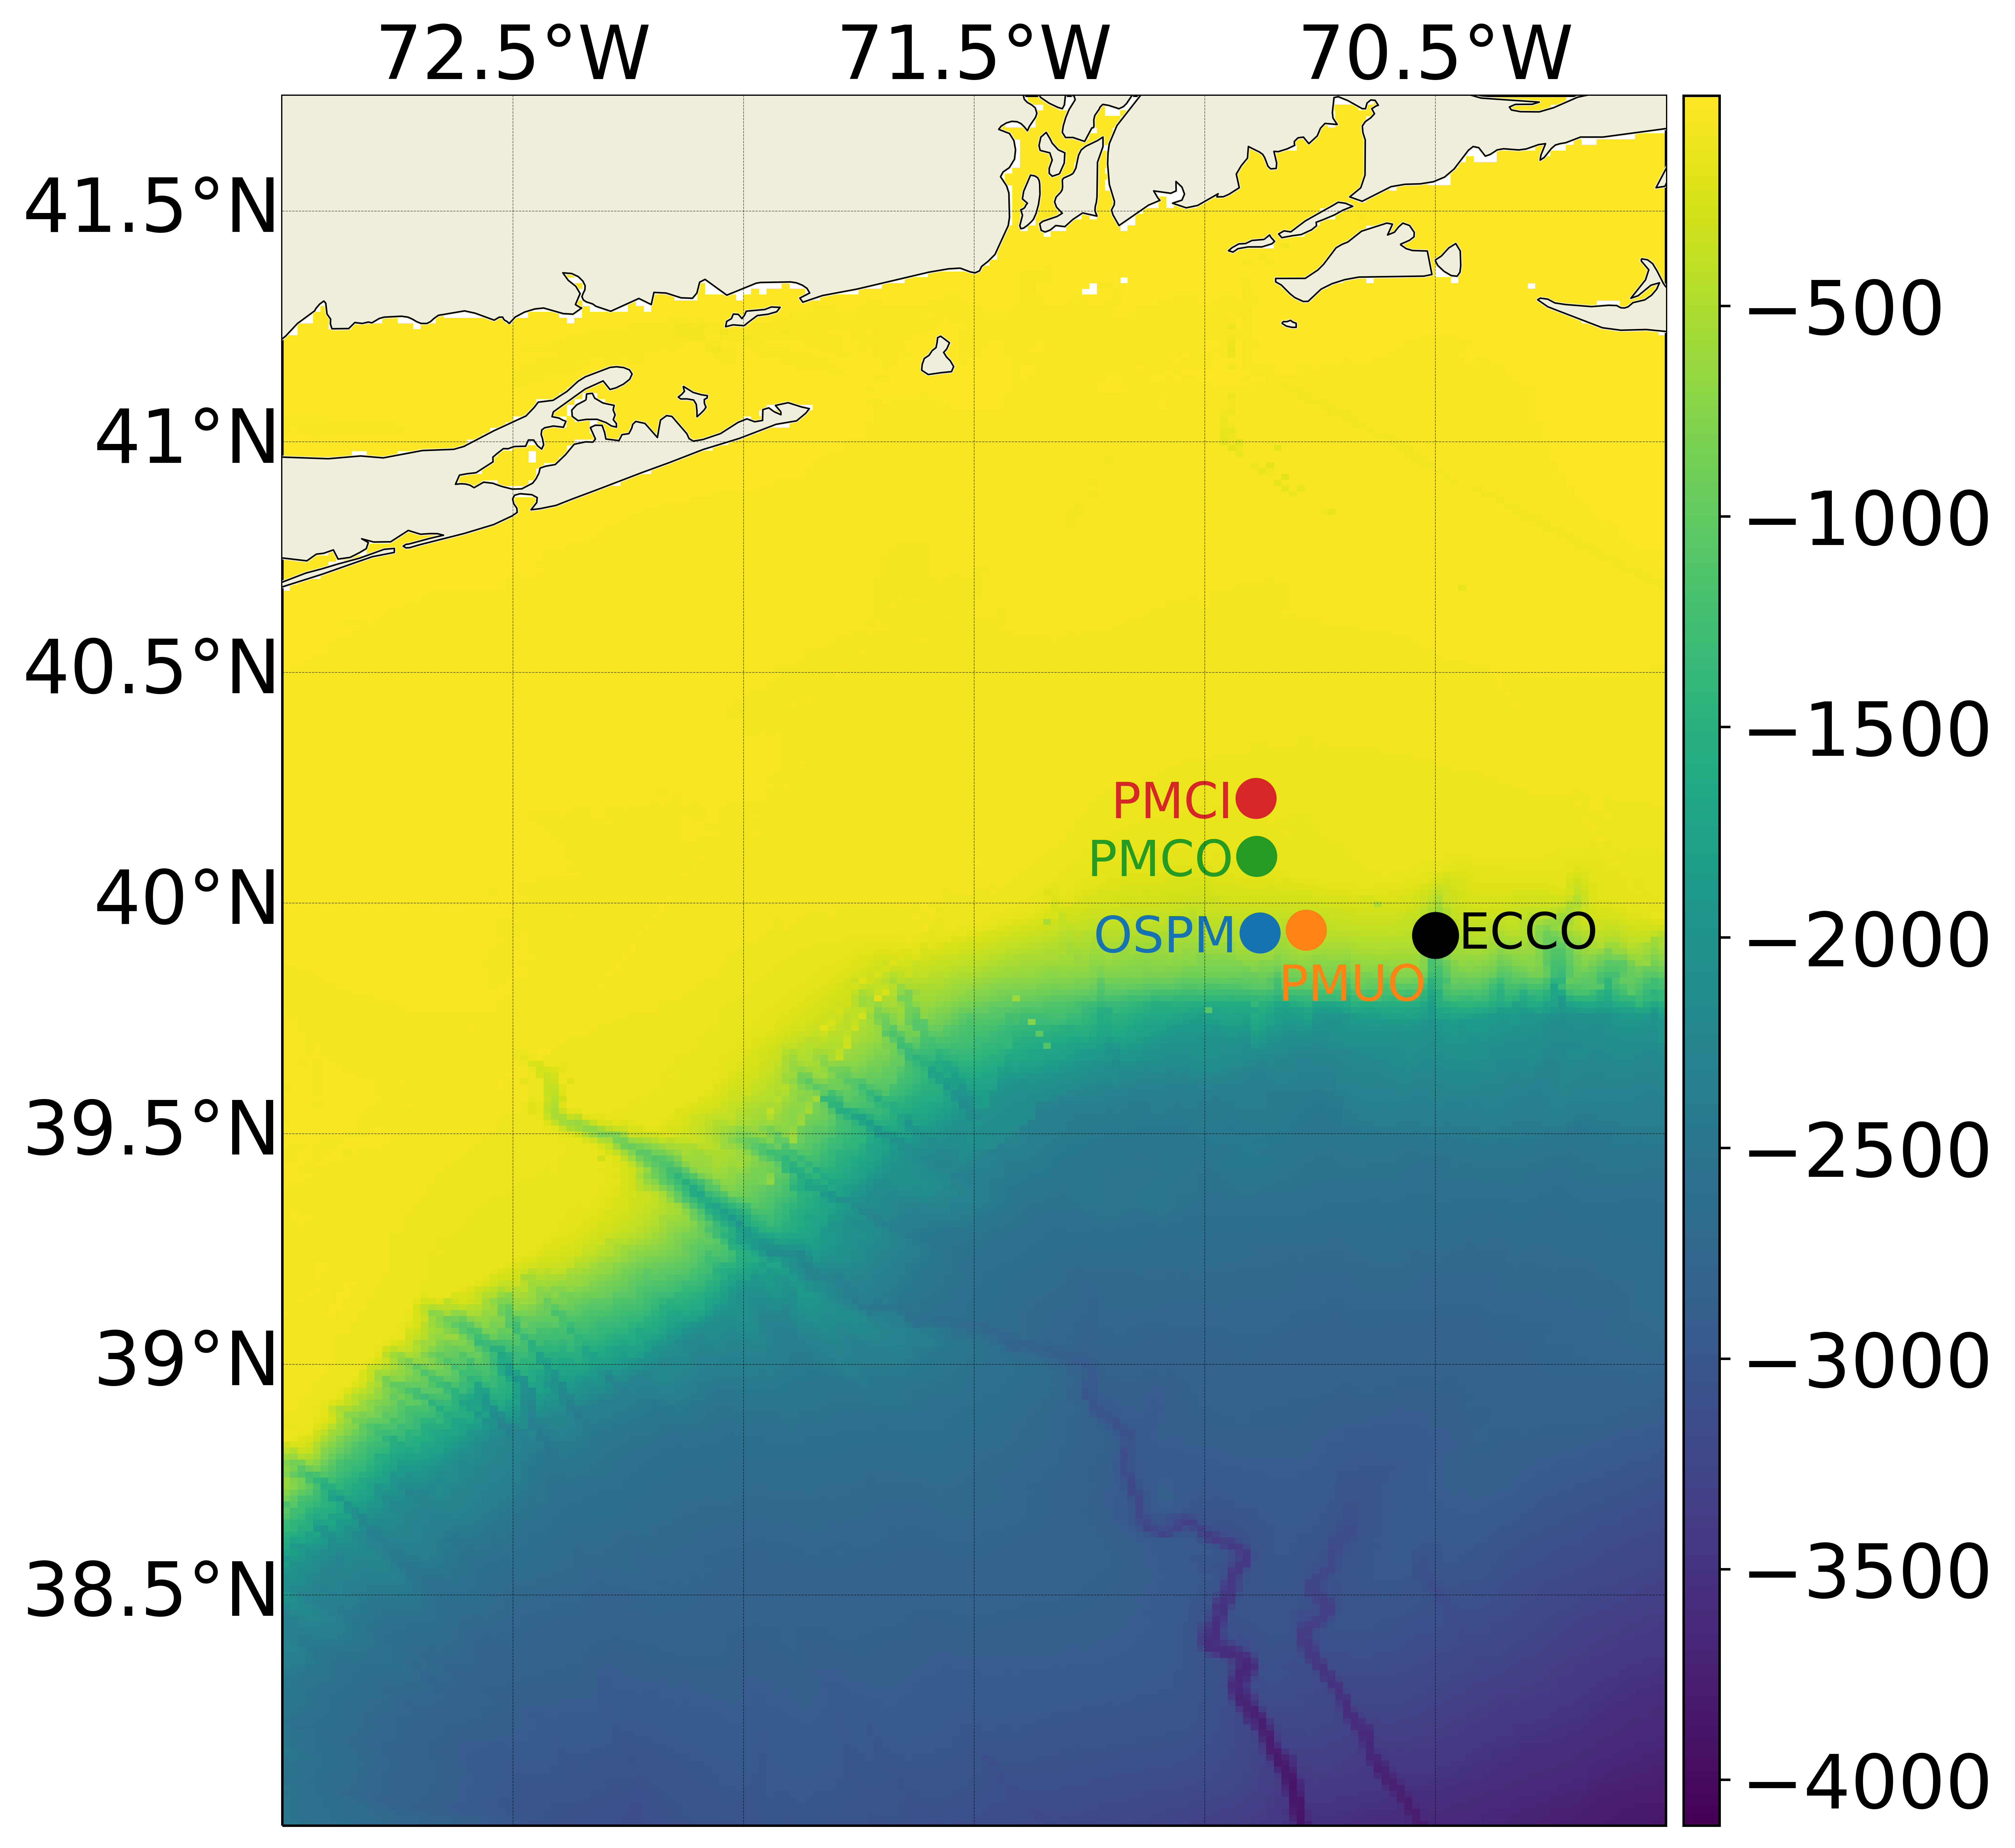

In [12]:
vizBathy()#filename='../img/pioneerRegion_bathymetry_coastlines.png')

<sub> Written by Escobar, I. 21 February 2022 </sub>